In [5]:
from flask import Flask

In [1]:
import import_ipynb
from service import analize

importing Jupyter notebook from service.ipynb


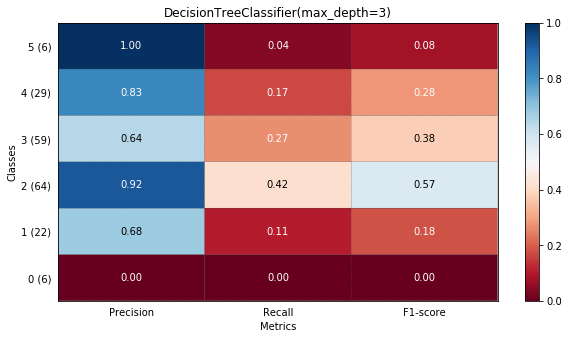

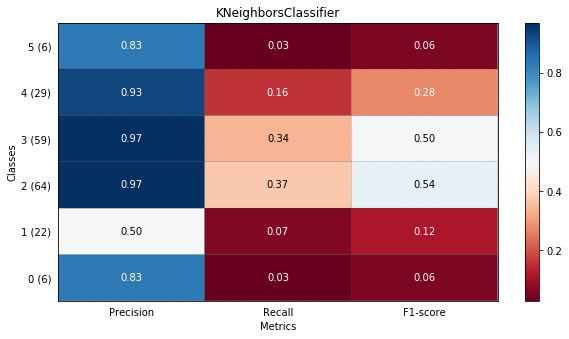

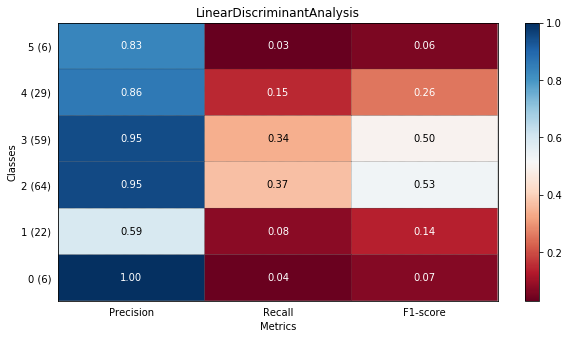

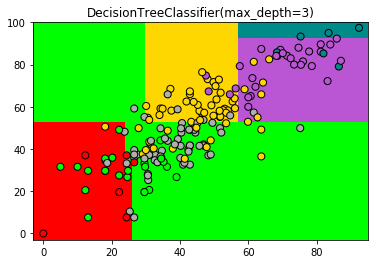

service.ipynb:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  "from sklearn.metrics import confusion_matrix\n",


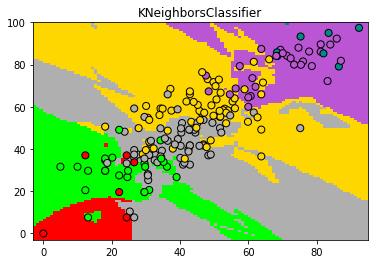

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


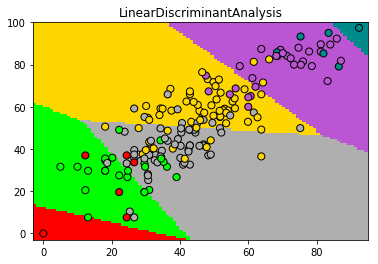

In [2]:
analize('k')

In [6]:
app = Flask(__name__)

@app.route("/")
@app.route("/train")
def hello():
    return "Hello World!2"


In [ ]:

if __name__ == "__main__":
    app.run()